**Index No : 200462U**

**Name : Randika Perera**

# Section 1: Data Preprocessing

**1. Use the code given in listing 1 to generate data. Please use your index number for data generation.**

**2. Plot the generated data (signal).**

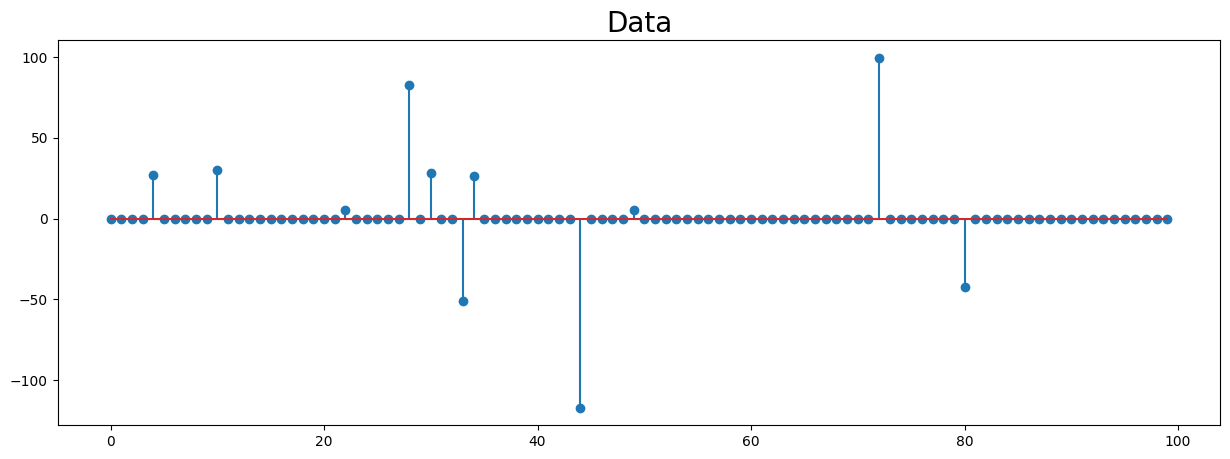

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_signal(signal_length, num_nonzero):
    signal = np.zeros(signal_length)
    nonzero_indices = np.random.choice(signal_length, num_nonzero, replace=False)
    nonzero_values = 50*np.random.randn(num_nonzero)  
    signal[nonzero_indices] = nonzero_values
    return signal

signal_length = 100    # Total length of the signal
num_nonzero = 10       # Number of non-zero elements in the signal

# Index No: 200462U
your_index_no=200462   # Enter without english letter and without leading zeros


signal = generate_signal(signal_length, num_nonzero)
signal[10] = (your_index_no % 10)*10 + 10

if  your_index_no % 10 == 0:
    signal[10] = np.random.randn(1) + 30

signal=signal.reshape(signal_length,1)

plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.title("Data",fontsize=20)
plt.stem(signal)

plt.show()

**3. Apply the following normalization methods**

- MaxAbsScaler (preprocessing.MaxAbsScaler() from sklearn.preprocessing)
- Implement min-max and standard normalization yourself and apply the normalization on data.

***MaxAbs Scaler using sklearn inbuilt function***

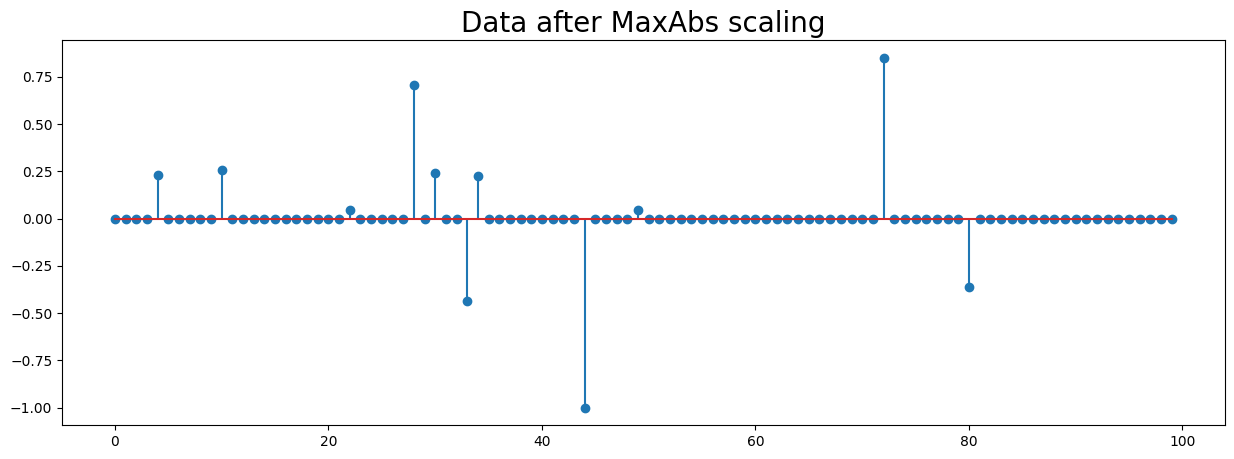

In [2]:
from sklearn import preprocessing

max_abs_scaler = preprocessing.MaxAbsScaler()
data_scaled_using_MaxAbs_Scaler = max_abs_scaler.fit_transform(signal)

plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.title("Data after MaxAbs scaling",fontsize=20)
plt.stem(data_scaled_using_MaxAbs_Scaler)

plt.show()


***MinMax Scaler using Custom Defined Function***

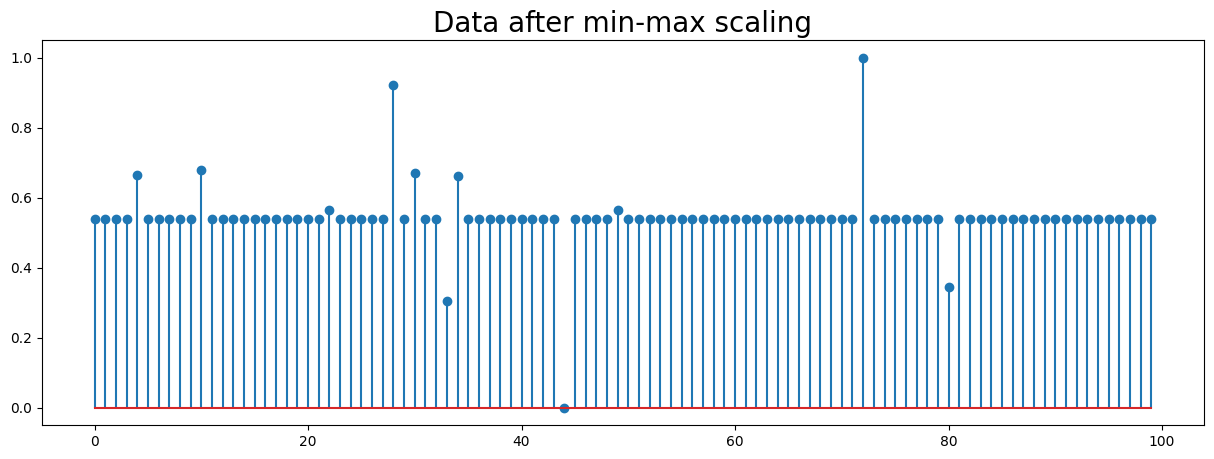

In [3]:
def min_max_scale(data):
    min_val=np.min(data)
    max_val=np.max(data)
    scaled_data=(data-min_val)/(max_val-min_val)
    return scaled_data

data_scaled_using_min_max_scale=min_max_scale(signal)

plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.title("Data after min-max scaling",fontsize=20)
plt.stem(data_scaled_using_min_max_scale)

plt.show()

***Standard Normalization using Custom Defined Function***

mean of data 0.9395311729724972 std of data 19.49704279190846


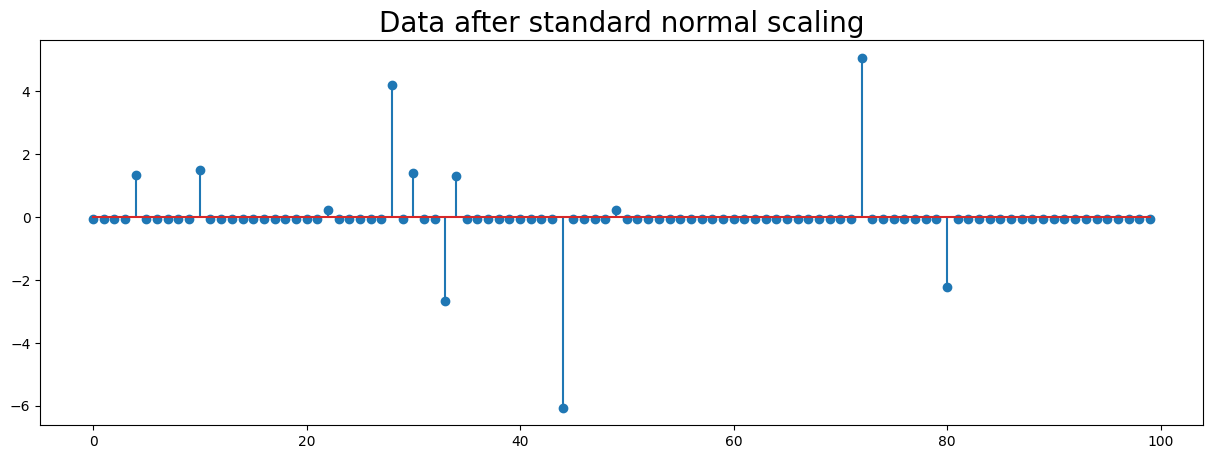

In [4]:
def standard_normal_scaler(data):
    mean=np.mean(data)
    std =np.std(data)
    print("mean of data", mean, "std of data", std)
    scaled_data = (data - mean) / std
    return scaled_data

data_scaled_using_standard_normal_scaler=standard_normal_scaler(signal)

plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.title("Data after standard normal scaling",fontsize=20)
plt.stem(data_scaled_using_standard_normal_scaler)

plt.show()

***Let's compare Custom functions with Sklearn inbuilt functions to verify that my custom functions are correct***

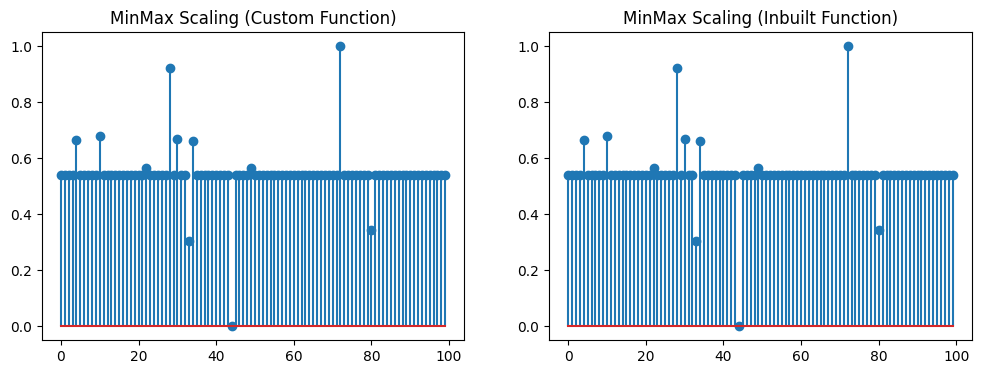

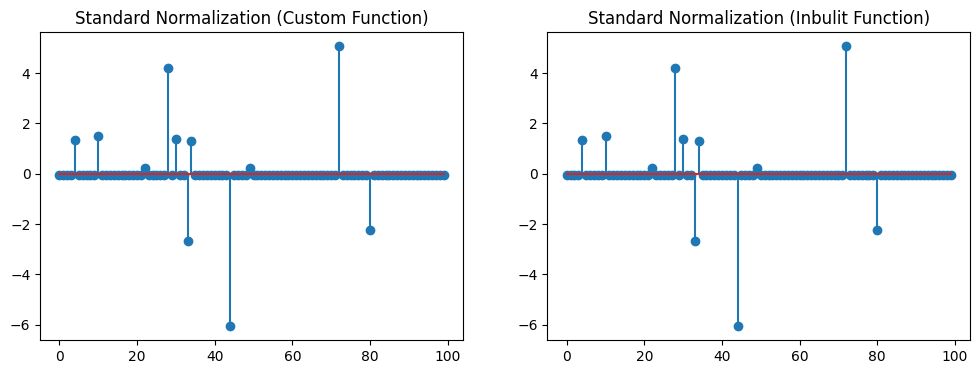

In [5]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.title("MinMax Scaling (Custom Function)",fontsize=12)
plt.stem(data_scaled_using_min_max_scale)

plt.subplot(1, 2, 2)
plt.title("MinMax Scaling (Inbuilt Function)",fontsize=12)
min_max_scaler = preprocessing.MinMaxScaler()
plt.stem(min_max_scaler.fit_transform(signal))


plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.title("Standard Normalization (Custom Function)",fontsize=12)
plt.stem(data_scaled_using_standard_normal_scaler)

plt.subplot(1, 2, 2)
plt.title("Standard Normalization (Inbulit Function)",fontsize=12)
standard_scaler = preprocessing.StandardScaler()
plt.stem(standard_scaler.fit_transform(signal))

plt.show()


After observing the above plots, custom functions seem to be correct.

**4. Visualize the data before and after normalization. Create stem plots of the original and normalized data to visualize the effects of each normalization method on the data.**

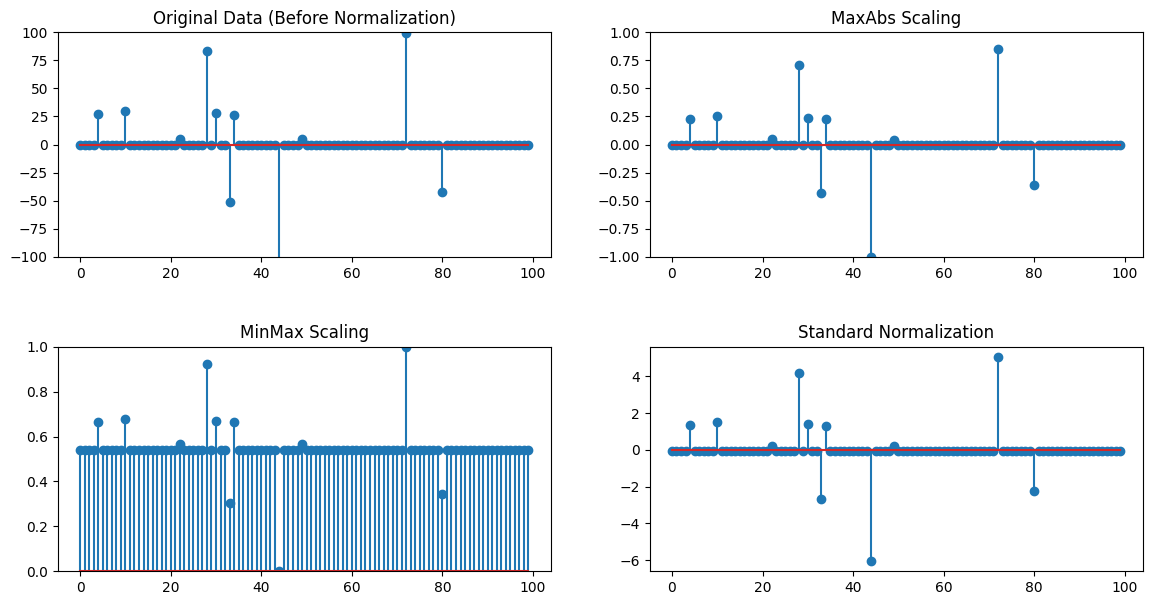

In [6]:
plt.figure(figsize=(14, 7))
plt.subplots_adjust(wspace=0.2, hspace=0.4)

plt.subplot(2, 2, 1)
plt.title("Original Data (Before Normalization)",fontsize=12)
plt.ylim(-100, 100)
plt.stem(signal)

plt.subplot(2, 2, 2)
plt.title("MaxAbs Scaling",fontsize=12)
plt.ylim(-1, 1)
plt.stem(data_scaled_using_MaxAbs_Scaler)

plt.subplot(2, 2, 3)
plt.title("MinMax Scaling",fontsize=12)
plt.ylim(0, 1)
plt.stem(data_scaled_using_min_max_scale)

plt.subplot(2, 2, 4)
plt.title("Standard Normalization",fontsize=12)
plt.stem(data_scaled_using_standard_normal_scaler)

plt.show()

**5. How many none-zero elements in the data before the normalization and after the
normalization.**

In [7]:
non_zero_original        = np.count_nonzero(signal)
non_zero_max_abs         = np.count_nonzero(data_scaled_using_MaxAbs_Scaler)
non_zero_min_max         = np.count_nonzero(data_scaled_using_min_max_scale)
non_zero_standard_normal = np.count_nonzero(data_scaled_using_standard_normal_scaler)

print("Non-zero elements in Original Data:", non_zero_original)
print("Non-zero elements after MaxAbs Scaling:", non_zero_max_abs)
print("Non-zero elements after MinMax Scaling:", non_zero_min_max)
print("Non-zero elements after Standard Normalization:", non_zero_standard_normal)

Non-zero elements in Original Data: 11
Non-zero elements after MaxAbs Scaling: 11
Non-zero elements after MinMax Scaling: 99
Non-zero elements after Standard Normalization: 100


**6. Compare how each normalization method scales the data and its impact on structure
of the data.**

- MaxAbs Scaler: Scales each feature by its maximum absolute value. This estimator scales and translates each feature individually such that the maximal absolute value of each feature in the training set will be 1.0. It does not shift/center the data, and thus does not destroy any sparsity. Range of the transformed data is [-1,1]. 

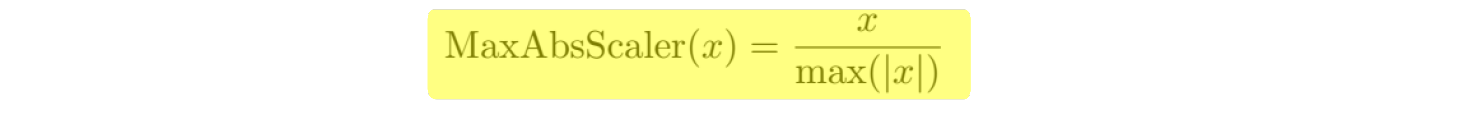

- MinMax Scaler: Transforms features by scaling each feature to a given range. This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one. Range of the transformed data is [0,1]. 

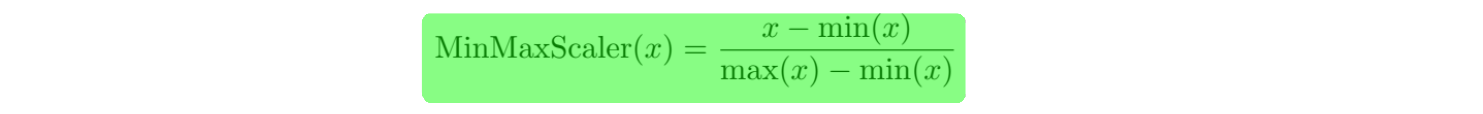

- Standardization: Scales the features of the dataset to have zero mean and unit variance. There is no constraint on the range of the transformed data.

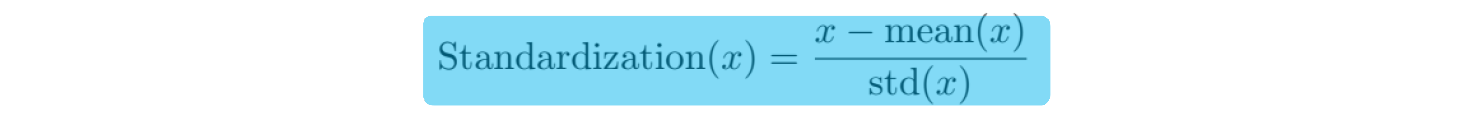

**7. Discuss the effects of each normalization method on the data’s distribution, structure, and scale. Which normalization approach you recommend for this kind of data and what is the reason behind this?**

All of the methods we used only changed the scale of the data, leaving the shape of the dataset unchanged. The only difference between the methods is the range of the transformed data.

Our original signal seems to be a sparse signal. It has 100 data points but only 11 non-zero data points. 

When we did the scaling using the different methods, we obtained the following results,

- Non-zero elements in Original Data : 11
- Non-zero elements after MaxAbs Scaling : 11
- Non-zero elements after MinMax Scaling : 99
- Non-zero elements after Standard Normalization: 100

- When we use MaxAbs Scaling, the sparsity of the data is preserved. 
- We can clearly see that the sparsity of the data is destroyed when we use MinMax Scaling. Therefore, we can conclude that MinMax Scaling is not suitable for this kind of data. 
- When we use Standard Normalization, the sparsity of the data is destroyed. Therefore, we can conclude that Standard Normalization is not suitable for this kind of data.

So, we can conclude that MaxAbs Scaling is the best normalization method for this kind of data.

# Section 2: Linear Regression on Real World Data

**1. Load the dataset given in this url. The data illustrates the relationship between advertising budgets (in thousands of dollars) allocated to TV, radio, and newspaper media and the corresponding sales (in thousands of units) for a specific product. Use the code given in listing 3 to load data from CSV.**

In [8]:
import pandas as pd

file_path=r'C:\Users\Randika Perera\OneDrive - University of Moratuwa\Semester 5\S5 - EN3150 - Pattern Recognition\Assignment 1\Assignment 01 Supporting Materials\Advertising.csv'
df=pd.read_csv(file_path)

print(df.head())

   sample index     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9


**2. Split the data into training and testing sets with 80% of data points for training and
20% of data points for testing.**

In [9]:
from sklearn.model_selection import train_test_split

X=df[['TV','radio','newspaper']]
y=df['sales']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

print(X_train.shape) 
print(X_test.shape)

(160, 3)
(40, 3)


**3. Train a linear regression model and estimate the coefficient corresponds to independent variables (advertising budgets for TV, radio and newspapers).**

In [10]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train,y_train)

print("Intercept\t\t\t\t: ",model.intercept_)
print("Regression coefficient of TV\t\t: ",model.coef_[0])    
print("Regression coefficient of radio\t\t: ",model.coef_[1])
print("Regression coefficient of newspaper\t: ",model.coef_[2])

Intercept				:  2.931280343575777
Regression coefficient of TV		:  0.04688034130700544
Regression coefficient of radio		:  0.18243279575750565
Regression coefficient of newspaper	:  -0.0016467403865370453


**4. Evaluate train model on testing data, calculate following statistics for testing and training data.**

- Residual sum of squares (RSS)
- Residual Standard Error (RSE)
- Mean Squared Error (MSE)
- $R^{2}$ statistic
- Std. Error for each feature
- t-statistic for each feature
- p-value for each feature

***First let's find the required statistics for the Testing Dataset***

In [11]:
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,r2_score

y_predicted_using_testing_data=model.predict(X_test)

In [12]:
print('Determing Statistics Using the Testing Dataset')

RSS = np.sum((y_test-y_predicted_using_testing_data)**2)
print("Residual Sum of Squares (RSS) \t:",RSS)

N   = len(y_test)
d   = len(model.coef_) + 1
RSE = np.sqrt((RSS/(N-d)))
print("Residual Standard Error (RSE) \t:",RSE)

MSE = mean_squared_error(y_test,y_predicted_using_testing_data)
print("Mean Squared Error (MSE) \t:",MSE)

R2  = r2_score(y_test,y_predicted_using_testing_data)
print("R2 Statistic \t\t\t:",R2)

Determing Statistics Using the Testing Dataset
Residual Sum of Squares (RSS) 	: 102.03858463812432
Residual Standard Error (RSE) 	: 1.6835691636629566
Mean Squared Error (MSE) 	: 2.550964615953108
R2 Statistic 			: 0.8984204533332627


In [13]:
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

X_with_intercept=sm.add_constant(X_test)

model_sm=sm.OLS(y_test,X_with_intercept).fit()

print("Here we are considering the Testing Dataset")
print("The model summary shown below will show Std. Error, t-statistic and p-value for each feature.")
print()
print(model_sm.summary())

Here we are considering the Testing Dataset
The model summary shown below will show Std. Error, t-statistic and p-value for each feature.

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     130.6
Date:                Sat, 09 Sep 2023   Prob (F-statistic):           2.10e-19
Time:                        14:33:03   Log-Likelihood:                -71.723
No. Observations:                  40   AIC:                             151.4
Df Residuals:                      36   BIC:                             158.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025     

***Now let's find the required statistics for the Training Dataset***

In [14]:
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,r2_score

y_predicted_using_training_data=model.predict(X_train)

In [15]:
print('Determing Statistics Using the Training Dataset')

RSS = np.sum((y_train-y_predicted_using_training_data)**2)
print("Residual Sum of Squares (RSS) \t:",RSS)

N   = len(y_train)
d   = len(model.coef_) + 1
RSE = np.sqrt((RSS/(N-d)))
print("Residual Standard Error (RSE) \t:",RSE)

MSE = mean_squared_error(y_train,y_predicted_using_training_data)
print("Mean Squared Error (MSE) \t:",MSE)

R2  = r2_score(y_train,y_predicted_using_training_data)
print("R2 Statistic \t\t\t:",R2)

Determing Statistics Using the Training Dataset
Residual Sum of Squares (RSS) 	: 458.2330091720827
Residual Standard Error (RSE) 	: 1.713881875870221
Mean Squared Error (MSE) 	: 2.863956307325517
R2 Statistic 			: 0.8956962280033929


In [16]:
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

X_with_intercept=sm.add_constant(X_train)

model_sm=sm.OLS(y_train,X_with_intercept).fit()

print("Here we are considering the Training Dataset")
print("The model summary shown below will show Std. Error, t-statistic and p-value for each feature.")
print()
print(model_sm.summary())

Here we are considering the Training Dataset
The model summary shown below will show Std. Error, t-statistic and p-value for each feature.

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     446.5
Date:                Sat, 09 Sep 2023   Prob (F-statistic):           2.54e-76
Time:                        14:33:03   Log-Likelihood:                -311.21
No. Observations:                 160   AIC:                             630.4
Df Residuals:                     156   BIC:                             642.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025    

**5. Is there a relationship between advertising budgets and sales?**

Yes. There is a relationship between advertising budgets and sales. The regression coefficients with respect to TV, Radio and Newspaper are all non-zero. Therefore, we can conclude that there is a relationship between advertising budgets and sales. 

Further we can also use the $R^{2}$ statistic to verify this. The $R^{2}$ statistic for the training dataset is 0.896. This means that 89.6% of the variability in the response variable (Sales) is explained by the model. Therefore, we can conclude that there is a relationship between advertising budgets and sales.

Note: I am using the statistics of the training dataset to answer this question since the model was trained using the training dataset.

**6. Which independent variable contributes highly on sales?**

We can use t-statistics and p-values to answer this question.

- Lower P value (<0.05) indicates that you can reject the null hypothesis. This means that the association between the response and the term is statistically significant.
- High absolute t-values indicate strong evidence against the null hypothesis, meaning the variable has a strong effect on sales.

When considering the statistics we obtained from the training dataset, p value of newspaper was 0.804 and p value of both TV and radio was 0.000. So we can conclude that newspaper does not contribute highly on sales while both TV and radio contribute to sales.

When considering t statistics, for TV it was 29.632  and for radio is was 18.673. So we can conclude that both TV and radio contribute highly on sales.

The regression coefficients of the independant variables are as follows,

- TV :             0.0469 
- radio :          0.1824
- newspaper :     -0.0016 

Since radio has the highest regression coefficient, we can conclude that the radio advertising budget contributes more to sales compared to the TV advertising budget.

**7. One may argue that possibly, allocating 25,000 dollars both television advertising and radio advertising individually (i.e., 25,000 dollars for TV and 25,000 dollars for radio) yields higher sales compared to investing 50,000 dollars in either television or radio advertising individually. Based on your trained model, comment on this argument. Here, assume that budged allocated for newspapers is zero.**

We can use the trained model to predict the sales for the following scenarios,

- TV = 25,000, Radio = 25,000, Newspaper = 0
- TV = 50,000, Radio = 0, Newspaper = 0
- TV = 0, Radio = 50,000, Newspaper = 0

In [17]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [18]:
print("TV=25000\tRadio=25000\tNewspaper=0",end='\t')
print(",\tSales: ",round(1000*model.predict([[25,25,0]])[0]),'\n')

print("TV=50000\tRadio=0\t\tNewspaper=0",end='\t')
print(",\tSales: ",round(1000*model.predict([[50,0,0]])[0]),'\n')

print("TV=0\t\tRadio=50000\tNewspaper=0",end='\t')
print(",\tSales: ",round(1000*model.predict([[0,50,0]])[0]))

TV=25000	Radio=25000	Newspaper=0	,	Sales:  8664 

TV=50000	Radio=0		Newspaper=0	,	Sales:  5275 

TV=0		Radio=50000	Newspaper=0	,	Sales:  12053


From the above predictions, we can clearly see that the highest amount of sales occur when we allocate 50,000 for radio individually.

So the arguement that allocating 25,000 dollars both television advertising and radio advertising individually yielding higher sales compared to investing 50,000 dollars in either television or radio advertising individually is wrong.

# Section 3: Linear Regression Impact on Outliers

**1. You are given set of data points related to independent variable (x) and dependent variable (y) in Table 1.**

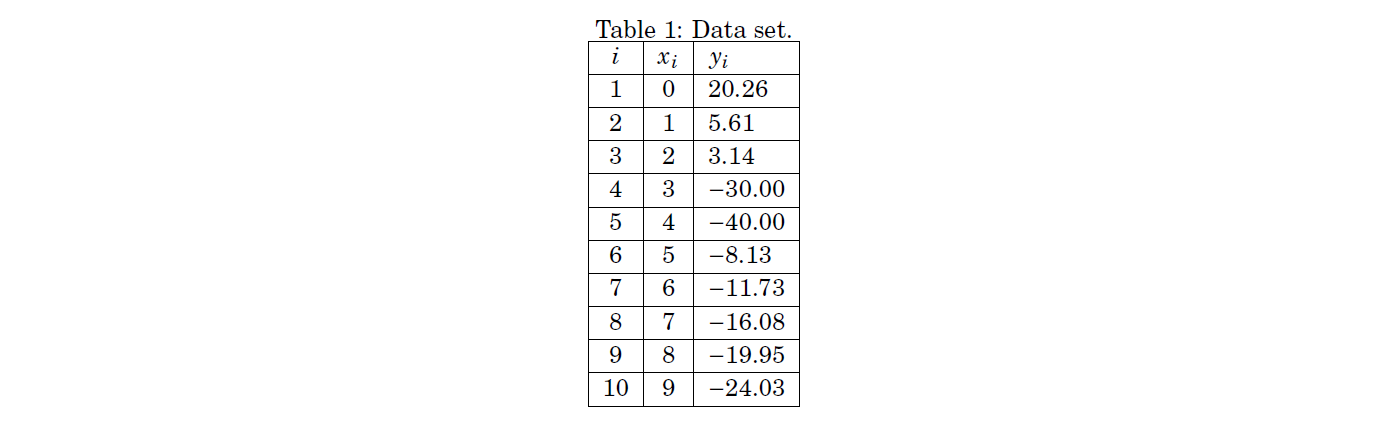

In [19]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([20.26, 5.61, 3.14, -30.00, -40.00, -8.13, -11.73, -16.08, -19.95, -24.03])

**2. Use all data given in Table 1 to find a linear regression model. Plot x, y as a scatter plot and plot your linear regression model in the same scatter plot.**

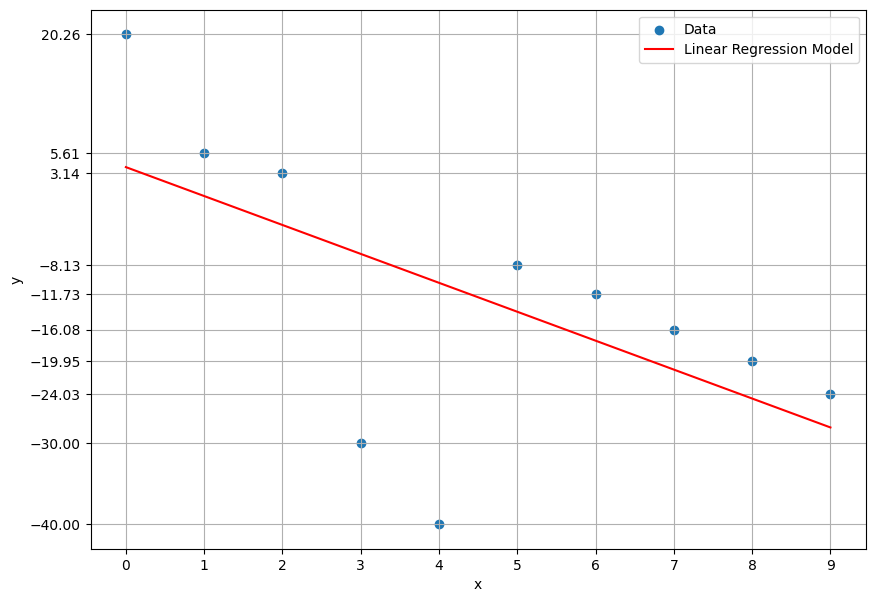

In [20]:
plt.figure(figsize=(10, 7))

plt.scatter(x, y, label='Data')

X=x.reshape(-1,1)
Y=y.reshape(-1,1)
regr = LinearRegression()
regr.fit(X, Y)
regression_line = regr.predict(X)
plt.plot(X, regression_line, color='red', label='Linear Regression Model')

plt.xticks(x)
plt.yticks(y)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
print('Coefficients of Linear Regression Model')
print('Intercept\t:\t', regr.intercept_[0])
print('Gradient\t:\t', regr.coef_[0][0])

Coefficients of Linear Regression Model
Intercept	:	 3.916727272727277
Gradient	:	 -3.557272727272728


**3. You are given two linear models as follows.**

- Model 1: $y = −4x + 12$
- Model 2: $y = −3.55x + 3.91$

Here, model 2 is your linear regression model which is learned in task 2. A robust estimator is introduced to reduce the impact of the outliers. The robust estimator finds model parameters which minimize the following loss function,

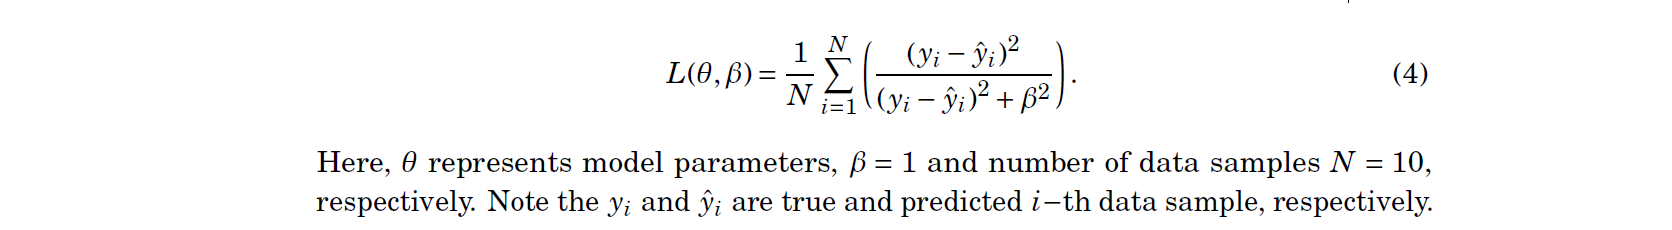

In [22]:
def loss_function_for_learned_model(X,Y):
    N=len(X)
    total=0
    for i in range(N):
        y_predict=regr.predict([[i]])[0]
        err=Y[i][0]-y_predict[0]
        term=(err**2)/((err**2)+1**2)
        total=total+term
    total=total/N
    return total

**4. For the given two models in task 3, calculate the loss function L($\theta$,$\beta$) values for all data samples using eq. (4)**

In [23]:
def model_1_prediction(x):
    temp=-4*x+12
    return temp

def model_2_prediction(x):
    temp=-3.55*x+3.91
    return temp

def loss_function(x,y,model):
    N=len(x)
    total=0
    for i in range(N):
        y_predict=model(x[i])
        err=y[i]-y_predict
        term=(err**2)/((err**2)+1**2)
        total=total+term
    total=total/N
    return total


print('Loss for the Model 1\t\t = ',loss_function(x,y,model_1_prediction))
print('Loss for the Model 2\t\t = ',loss_function(x,y,model_2_prediction))
print('Loss for the Learned Model\t = ',loss_function_for_learned_model(X,Y))
print('\nNote that model 2 is just a rounded off version of the learned model')

Loss for the Model 1		 =  0.435416262490386
Loss for the Model 2		 =  0.9728470518681676
Loss for the Learned Model	 =  0.9732472128655365

Note that model 2 is just a rounded off version of the learned model


**5. Utilizing this robust estimator, determine the most suitable model from the models specified in task 3 for the provided dataset. Justify your selection.**

- Model 1: $y = -4x + 12$
- Model 2: $y = -3.55x + 3.91$

The loss function values for the given two models are as follows,

- Loss for Model 1 = 0.4354
- Loss for Model 2 = 0.9728

From the above results, we can clearly see that the loss for Model 1 is much less than the loss for Model 2. Therefore, we can conclude that Model 1 is the most suitable model for the given dataset.

**6. How does this robust estimator reduce the impact of the outliers?**

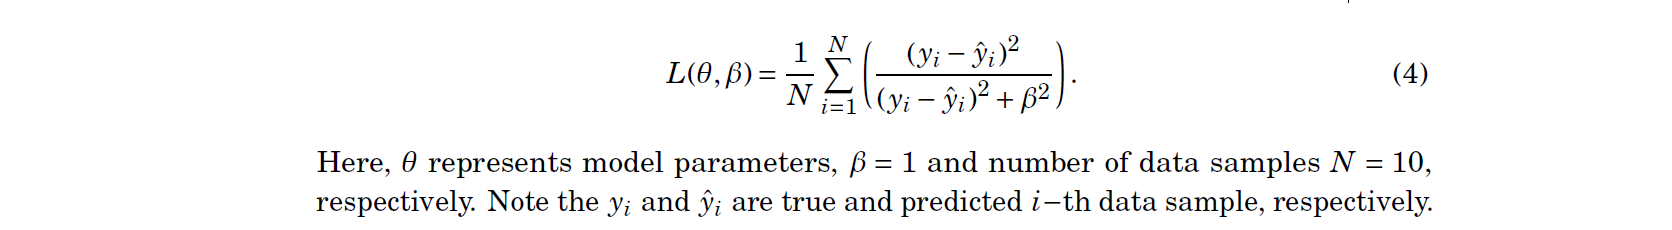

- When there are big differences between ($y_{i}$- $\hat{y}_{i}$), that means outliers are present.
- So when there are outliers, this error term ($y_{i}$- $\hat{y}_{i}$) will be large. So loss function will be large for that set of function parameters.
- When there are no outliers, this error term ($y_{i}$- $\hat{y}_{i}$) will be small. So loss function will be small for that set of function parameters.
- Robust estimator tries to find function parameters that minimizes the above loss function. So it will try to find function parameters that give the minimum possible value for the above loss function. This function will be the best fit for the given dataset with less impact from the outliers.

**7. Plot models specified in task 3 and data point to visualize the impact of the outliers.**

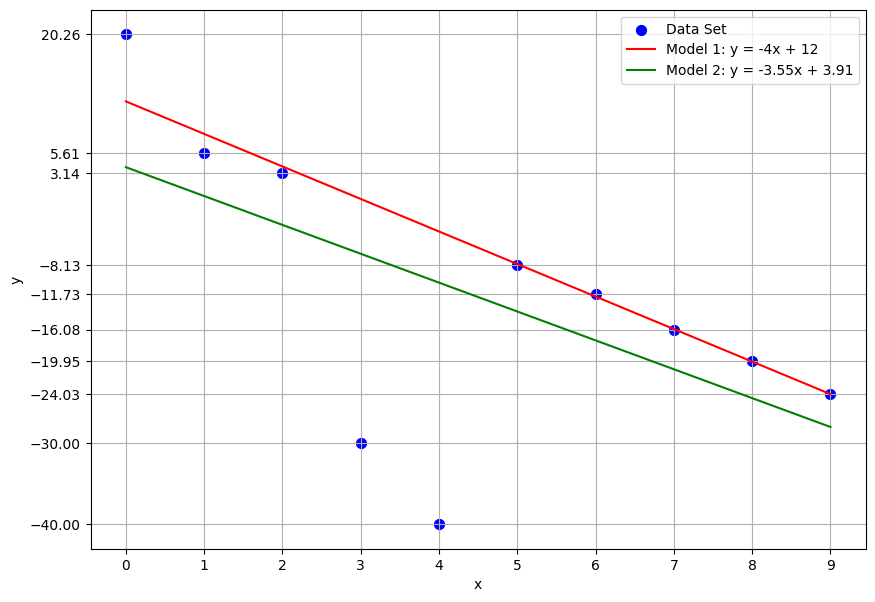

In [24]:
plt.figure(figsize=(10, 7))

plt.scatter(x, y, label='Data Set', color='blue', marker='o', s=50)

X=np.linspace(0,9,100)
Y=model_1_prediction(X)
plt.plot(X, Y, color='red', label='Model 1: y = -4x + 12')

X=np.linspace(0,9,100)
Y=model_2_prediction(X)
plt.plot(X, Y, color='green', label='Model 2: y = -3.55x + 3.91')

plt.xticks(x)
plt.yticks(y)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

**8. Briefly discuss the impact on $\beta$ in eq. (4) to in the context of reducing the impact of the outliers.**

- When the value of $\beta$ is increased, the values we obtain for the loss functions will becomes smaller. So trying to minimize the loss function by robust estimator will become less effective. Therefore, the impact of the outliers will be increased.

- When the value of $\beta$ is decreased, the values we obtain for the loss functions will becomes larger. So trying to minimize the loss function by robust estimator will become more effective. Therefore, the impact of the outliers will be reduced.

- So it is better to have a small value for $\beta$ to reduce the impact of the outliers.

***END OF THE ASSIGNMENT***